Problem Statement-
Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC.
You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [270]:
#importing necessary libraries
import pandas as pd
import numpy as np
import os
import tensorflow as tf
print("tensorflow version",tf.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
# to show the figures in the jupyter notebook itself
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

tensorflow version 2.5.0


In [271]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_bikes.csv', parse_dates=['datetime']) # loading the training data

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [272]:

train.tail() # looking at the training data from end


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


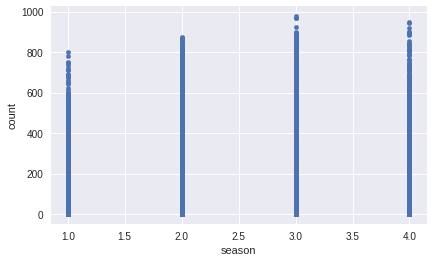

In [273]:
train.plot.scatter(x = 'season', y = 'count') # plotting the counts based on the season
plt.savefig('/content/drive/MyDrive/Colab Notebooks/season_vs_count.png', dpi=300, format='png', bbox_inches='tight') 

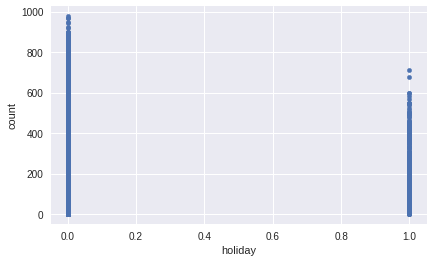

In [274]:
train.plot.scatter(x = 'holiday', y = 'count') # plotting the counts based on the holidays
plt.savefig('/content/drive/MyDrive/Colab Notebooks/holiday_vs_count.png', dpi=300, format='png', bbox_inches='tight') 

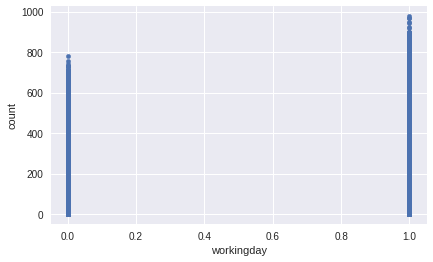

In [275]:
train.plot.scatter(x = 'workingday', y = 'count') # plotting the counts based on working day
plt.savefig('/content/drive/MyDrive/Colab Notebooks/workingday_vs_count.png', dpi=300, format='png', bbox_inches='tight') 

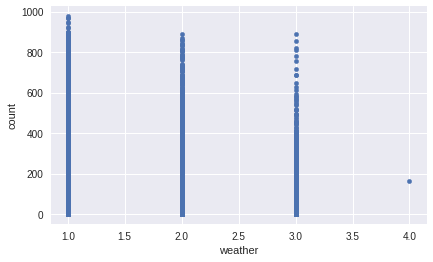

In [276]:
train.plot.scatter(x = 'weather', y = 'count') # plotting the counts based on the weather
plt.savefig('/content/drive/MyDrive/Colab Notebooks/weather_vs_count.png', dpi=300, format='png', bbox_inches='tight') 

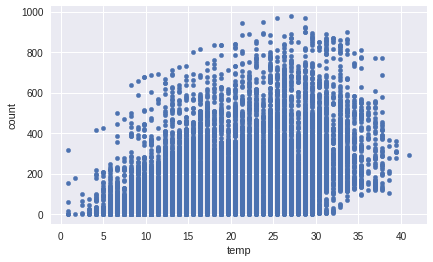

In [277]:
train.plot.scatter(x = 'temp', y = 'count') # plotting the counts based on the temparature
plt.savefig('/content/drive/MyDrive/Colab Notebooks/temperature_vs_count.png', dpi=300, format='png', bbox_inches='tight') 

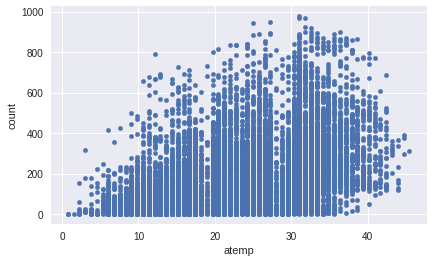

In [278]:
train.plot.scatter(x = 'atemp', y = 'count') # plotting the counts based on atemp
plt.savefig('/content/drive/MyDrive/Colab Notebooks/atemp_vs_count.png', dpi=300, format='png', bbox_inches='tight') 

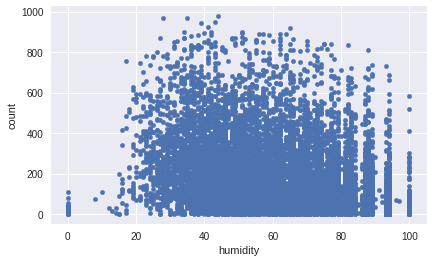

In [279]:
train.plot.scatter(x = 'humidity', y = 'count')# plotting the counts based on humidity
plt.savefig('/content/drive/MyDrive/Colab Notebooks/humidity_vs_count.png', dpi=300, format='png', bbox_inches='tight') 

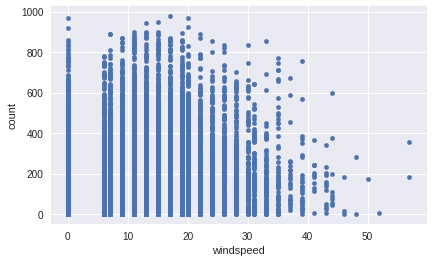

In [280]:
train.plot.scatter(x = 'windspeed', y = 'count') # plotting the counts based on windspeed
plt.savefig('/content/drive/MyDrive/Colab Notebooks/windspeed_vs_count.png', dpi=300, format='png', bbox_inches='tight') 

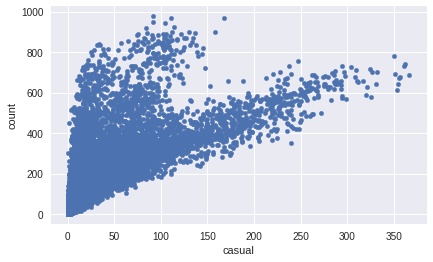

In [281]:
train.plot.scatter(x = 'casual', y = 'count')# plotting the counts based casual user
plt.savefig('/content/drive/MyDrive/Colab Notebooks/casualUser_vs_count.png', dpi=300, format='png', bbox_inches='tight') 

In [282]:

train.info() # observing the data types of the columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [283]:
train.describe() # Generate descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [284]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_bikes.csv') # loading the test data

In [285]:
test.head()  #looking at the 1st 5 rows of the test data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [286]:
test.tail() # last 5 rows of the test data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


In [287]:
test.info() # observing the data types of the columns for test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [288]:
test.describe() # Generate descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution for test data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [289]:
# installing the pandas profiling library. It is used for a deeper understanding than the normal Dataframe.describe() method
# !pip install pandas-profiling

In [290]:
# import pandas_profiling
# train.profile_report()

In [291]:
print("count samples & features: ", train.shape) # printing the number of rows and columns
print("Are there missing values: ", train.isnull().values.any()) # printing if dataset has any NaN value


count samples & features:  (10886, 12)
Are there missing values:  False


In [292]:
# train['hour'] =train["datetime"].dt.hour
# train.groupby(['hour', 'workingday'])['count'].agg(sum).unstack()

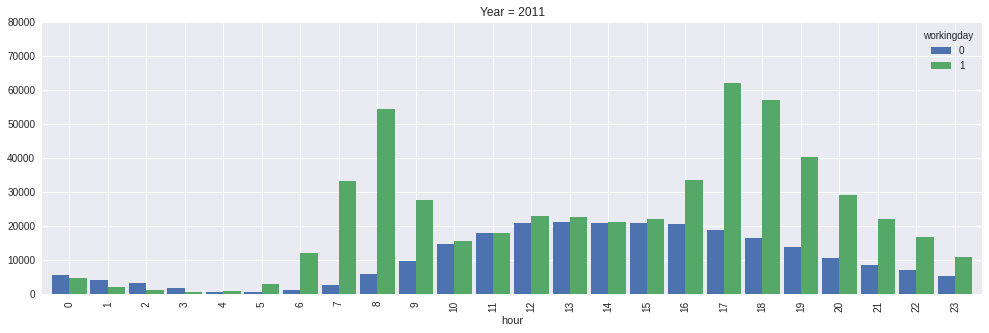

In [293]:
# method for creating the count plot based on hour for a given year 
def plot_by_hour(data, year=None, agg='sum'):
    dd = data
    if year: dd = dd[ dd.datetime.dt.year == year ]
    dd.loc[:, ('hour')] = dd.datetime.dt.hour # extracting the hour data if the year in the data is equal to the year passed as argument
    
    by_hour = dd.groupby(['hour', 'workingday'])['count'].agg(agg).unstack() # groupby hour and working day
    return by_hour.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year)) # returning the figure grouped by hour


plot_by_hour(train, year=2011) # plotting the count plot based on hour for 2011 
plot_by_hour(train, year=2012) # plotting the count plot based on hour for 2012
plt.savefig('/content/drive/MyDrive/Colab Notebooks/YearVsHour2011.png', dpi=300, format='png', bbox_inches='tight') 

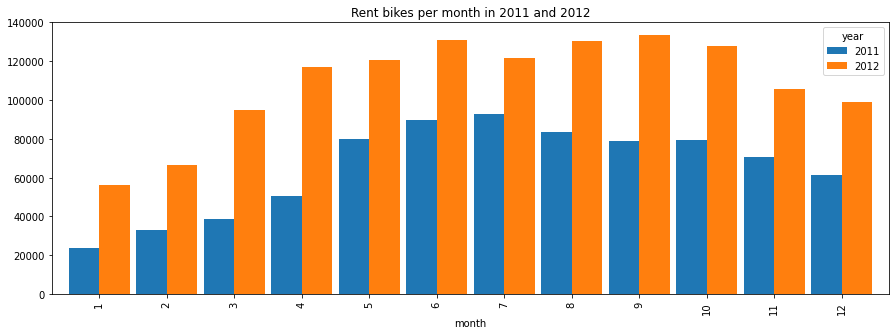

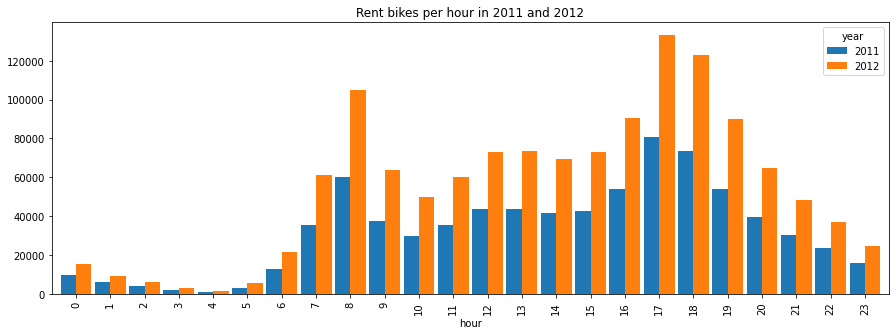

In [82]:
# method for creating the count plot based on year 
def plot_by_year(agg_attr, title):
    # extracting the required fields
    dd = train.copy()
    dd['year'] = train.datetime.dt.year # extratcing the year
    dd['month'] = train.datetime.dt.month # extratcing the month
    dd['hour'] = train.datetime.dt.hour # extratcing the hour
    
    by_year = dd.groupby([agg_attr, 'year'])['count'].agg('sum').unstack() # groupby year
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title) # returning the figure grouped by year


plot_by_year('month', "Rent bikes per month in 2011 and 2012") # plotting monthly bike rentals based on year
plot_by_year('hour', "Rent bikes per hour in 2011 and 2012") # plotting hourls bike rentals based  on year
plt.savefig('/content/drive/MyDrive/Colab Notebooks/MOnth_and_hour_vs_count.png', dpi=300, format='png', bbox_inches='tight') 

In [34]:
# method to plot a graph for count per hour
def plot_hours(data, message = ''):
    dd = data.copy()
    dd['hour'] = data.datetime.dt.hour # extratcing the hour
    
    hours = {}
    for hour in range(24):
        hours[hour] = dd[ dd.hour == hour ]['count'].values

    plt.figure(figsize=(20,10))
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("count vs hours\n" + message)
    plt.boxplot( [hours[hour] for hour in range(24)] )
    
    axis = plt.gca()
    axis.set_ylim([1, 1100])
 

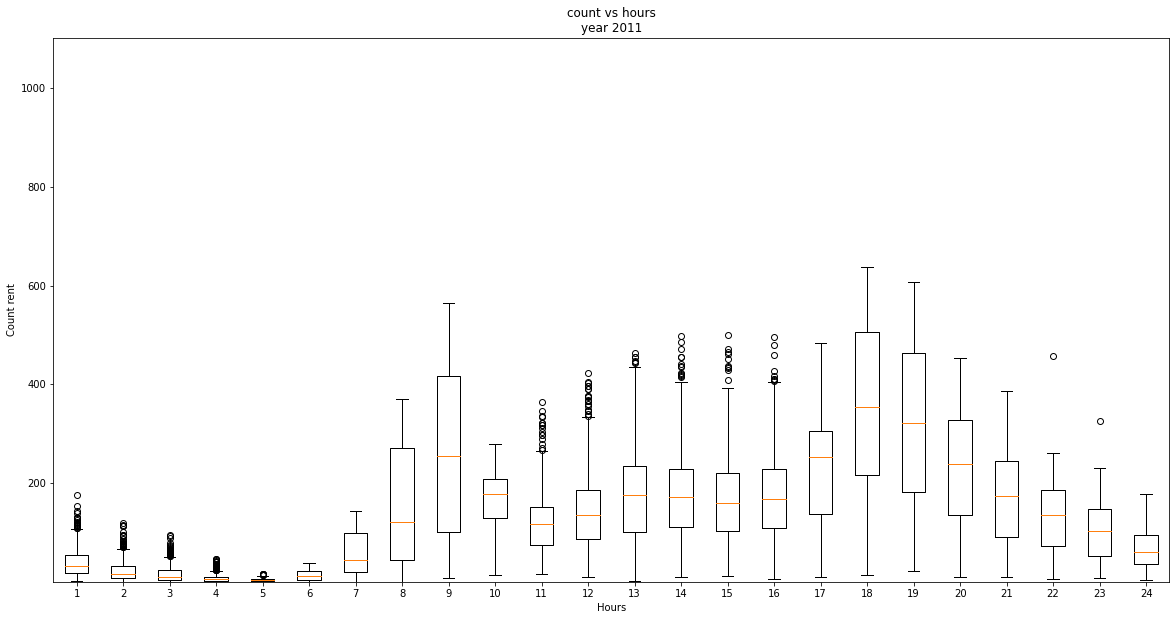

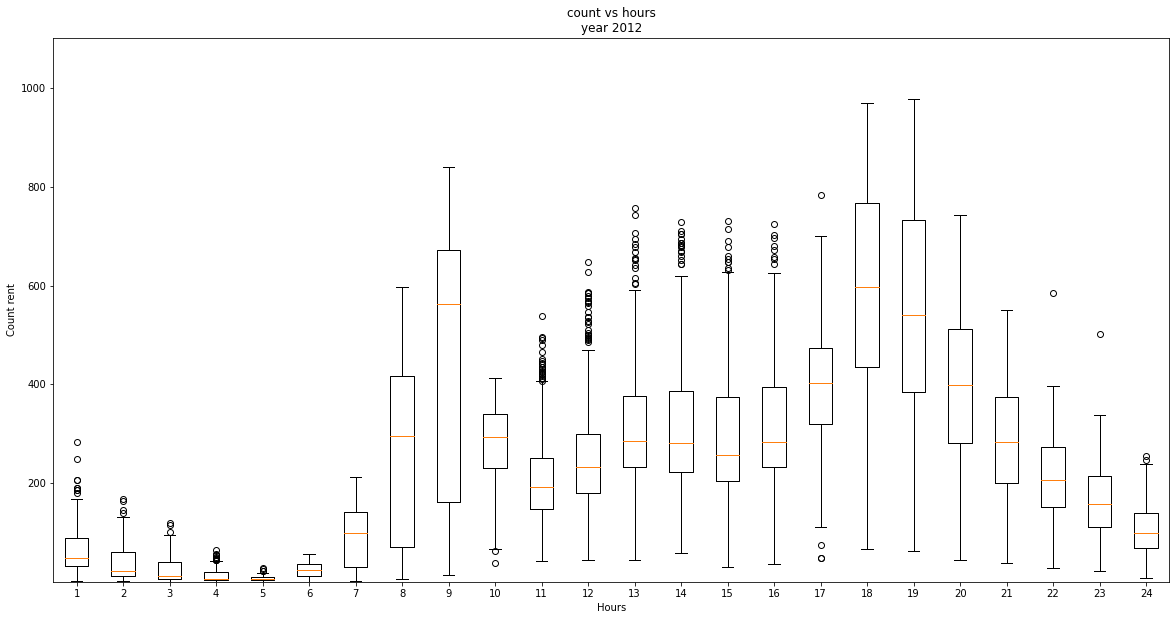

In [83]:
plot_hours( train[train.datetime.dt.year == 2011], 'year 2011') # box plot for hourly count for the mentioned year
plot_hours( train[train.datetime.dt.year == 2012], 'year 2012') # box plot for hourly count for the mentioned year
plt.savefig('/content/drive/MyDrive/Colab Notebooks/hourleycount_boxplot.png', dpi=300, format='png', bbox_inches='tight') 

In [84]:
dt = pd.to_datetime(train["datetime"]) # converting the column to datetime for train dataset
train["hour"] = dt.map(lambda x: x.hour) # adding the hour column for train dataset
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [85]:
dt_test = pd.to_datetime(test["datetime"]) # converting the column to datetime for test dataset
test["hour"] = dt_test.map(lambda x: x.hour) # adding the hour column for test dataset
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4


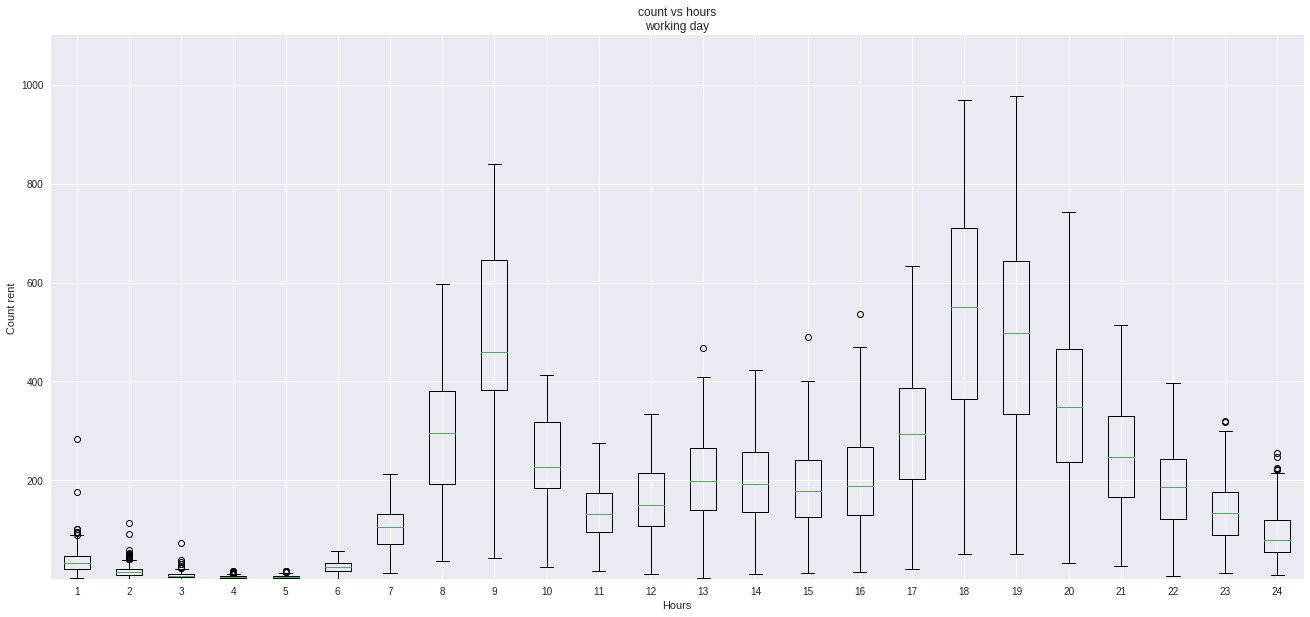

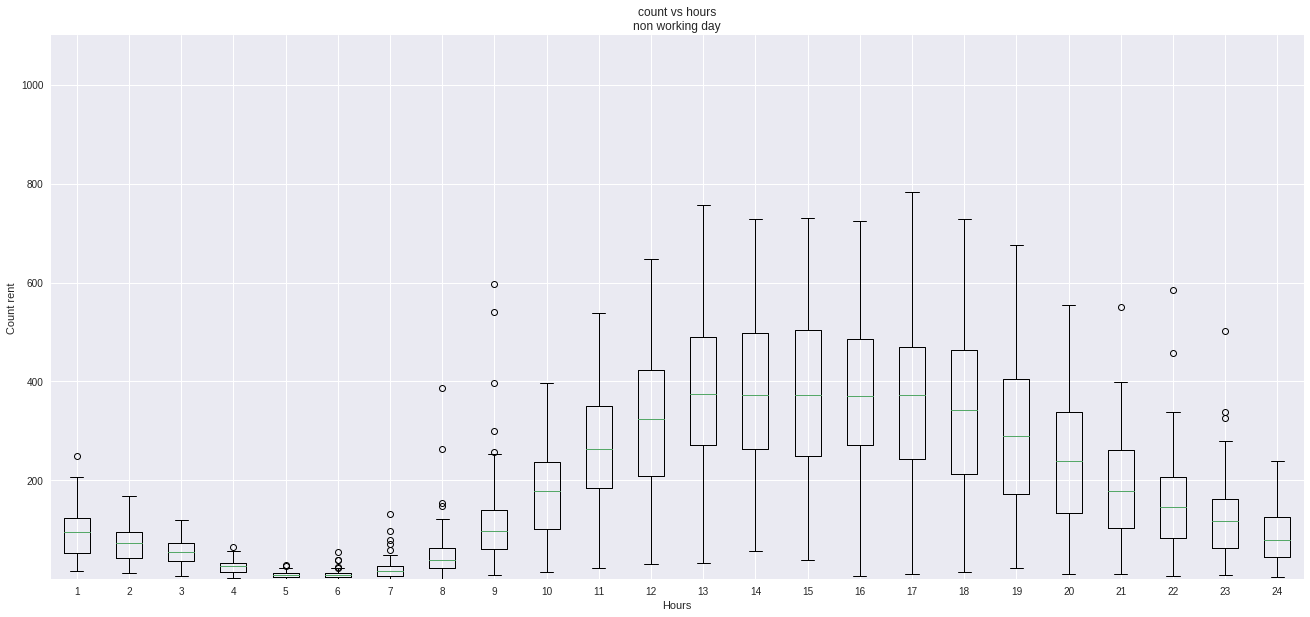

In [296]:

plot_hours( train[train.workingday == 1], 'working day') # plotting hourly count of rented bikes for working days for a given year
plot_hours( train[train.workingday == 0], 'non working day') # plotting hourly count of rented bikes for non-working days for a given year
plt.savefig('/content/drive/MyDrive/Colab Notebooks/hourlycount_Working.png', dpi=300, format='png', bbox_inches='tight') 

In [89]:
# method to convert categorical data to numerical data
def categorical_to_numeric(x):
    if 0 <=  x < 6:
        return 0
    elif 6 <= x < 13:
        return 1
    elif 13 <= x < 19:
        return 2
    elif 19 <= x < 24:
        return 3

In [90]:
train['hour'] = train['hour'].apply(categorical_to_numeric)# applying the above conversion logic to training data
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0


In [91]:
test['hour'] = test['hour'].apply(categorical_to_numeric) # applying the above conversion logic to test data
test.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0


In [92]:
# drop unnecessary columns

train = train.drop(['datetime'], axis=1)
test = test.drop(['datetime'], axis=1)

In [93]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0


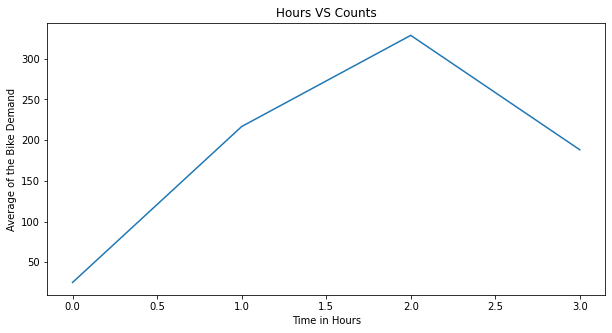

<Figure size 432x288 with 0 Axes>

In [95]:
# an Hour bs Count Graph depicting average bike demand based on the hour 
figure,axes = plt.subplots(figsize = (10, 5))
hours = train.groupby(["hour"]).agg("mean")["count"]  
hours.plot(kind="line", ax=axes) 
plt.title('Hours VS Counts')
axes.set_xlabel('Time in Hours')
axes.set_ylabel('Average of the Bike Demand')
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/HourVsCount.png', dpi=300, format='png', bbox_inches='tight') 

In [100]:
# count of different temp values
a = train.groupby('temp')[['count']].mean()
a

,count
temp,
0.82,77.714286
1.64,91.500000
2.46,43.000000
3.28,19.272727
4.10,50.272727
4.92,58.416667
5.74,53.233645
6.56,68.109589
7.38,67.754717


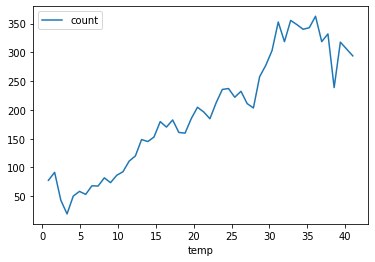

<Figure size 432x288 with 0 Axes>

In [101]:
a.plot()
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/temp_vs_count.png', dpi=300, format='png', bbox_inches='tight') 

In [102]:
# count of different atemp values
a = train.groupby('atemp')[['count']].mean()
a

,count
atemp,
0.760,1.000000
1.515,3.000000
2.275,38.000000
3.030,82.285714
3.790,39.062500
4.545,66.090909
5.305,63.200000
6.060,64.876712
6.820,56.380952


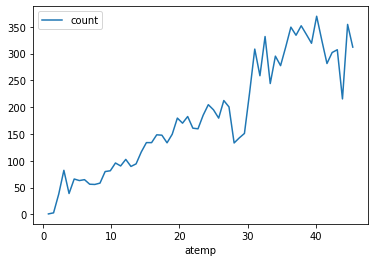

In [103]:
a.plot()
plt.show()

In [104]:
# count based on holiday
a = train.groupby('holiday')[['count']].mean()


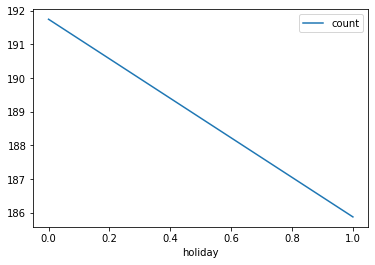

<Figure size 432x288 with 0 Axes>

In [105]:
a.plot()
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/holiday_vs_count.png', dpi=300, format='png', bbox_inches='tight') 

In [106]:
# method to  select the features. If a feature is not in the blaklist, it gets selected
def select_features(data):
    black_list = ['casual', 'registered', 'count', 'is_test', 'datetime', 'count_log']
    return [feat for feat in data.columns if feat not in black_list]


In [108]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
forest_reg = RandomForestRegressor(n_estimators=100) # instantiating the random Forest Regressor

score = cross_val_score(forest_reg, train, train, cv=4) # calcuating the cross validation score
print (score)


[0.99520008 0.99717987 0.99771692 0.99732299]


In [109]:
def create_data_sequence(X, y, time_steps=1):
    """ Create data sequence
    
    Arguments:
        * X: time-series data
        * y: Count "cnt" value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence
    
    """
    input_sequence, output_values = [], []
    for i in range(len(X) - time_steps):
        sequence = X.iloc[i:(i + time_steps)].values
        input_sequence.append(sequence)        
        output_values.append(y.iloc[i + time_steps])
    return np.array(input_sequence), np.array(output_values)


In [110]:
training_set_size = int(len(train)*0.9)
test_set_size = len(train)-training_set_size
training_set,test_set = train.iloc[0:training_set_size],train.iloc[training_set_size:len(train)]
print("Length of training set is", len(training_set))    
print("Length of test set is",len(test_set))


Length of training set is 9797
Length of test set is 1089


In [111]:
training_set.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'hour'],
      dtype='object')

In [112]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['temp','humidity','windspeed']
scaling_transformer = StandardScaler().fit(training_set[columns_to_scale].to_numpy())
cnt_transformer = StandardScaler().fit(training_set[['count']])

training_set.loc[:,columns_to_scale] = scaling_transformer.transform(training_set[columns_to_scale].to_numpy())
#training_y = cnt_transformer.transform(training_set["count"].values.reshape(1,-1))
training_set['count']  = cnt_transformer.transform(training_set[["count"]].to_numpy())

test_set.loc[:,columns_to_scale] = scaling_transformer.transform(test_set[columns_to_scale].to_numpy())
test_set['count'] = cnt_transformer.transform(test_set[['count']].to_numpy())


In [113]:
type(training_set["count"])

pandas.core.series.Series

In [114]:
time_steps = 7

training_set_sequence, training_set_output = create_data_sequence(training_set, training_set["count"], time_steps)
test_set_sequence, test_set_output = create_data_sequence(test_set, test_set["count"], time_steps)

# We get training and test set sequences as [samples, time_steps, n_features]

print("Training data shape", training_set_sequence.shape, "Training data output shape", training_set_output.shape)
print("Test data shape", test_set_sequence.shape, "Test data output shape", test_set_output.shape)

Training data shape (9790, 7, 12) Training data output shape (9790,)
Test data shape (1082, 7, 12) Test data output shape (1082,)


In [216]:
def LSTM_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=128,input_shape=(training_set_sequence.shape[1], training_set_sequence.shape[2])))
    model.add(tf.keras.layers.Dropout(rate=0.2))
    model.add(tf.keras.layers.Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='Adam')
    model.summary()
    return model

In [217]:
def bi_directional_LSTM_model():
  bi_directional_model = tf.keras.Sequential()
  bi_directional_model.add(tf.keras.layers.Bidirectional(
      tf.keras.layers.LSTM(units=128),
          input_shape=(training_set_sequence.shape[1],training_set_sequence.shape[2])
          )
      )
  bi_directional_model.add(tf.keras.layers.Dropout(rate=0.2))
  bi_directional_model.add(tf.keras.layers.Dense(units=1))
  bi_directional_model.compile(loss='mean_squared_error', optimizer='Adam')
  bi_directional_model.summary()
  bi_directional_model.build(input_shape=input_shape)
  return bi_directional_model

In [218]:
def encoder_decoder_model():
  enc_dec_model = tf.keras.Sequential()
  enc_dec_model.add(tf.keras.layers.LSTM(200, activation='relu', input_shape=(training_set_sequence.shape[1],training_set_sequence.shape[2])))
  enc_dec_model.add(tf.keras.layers.RepeatVector(7))
  enc_dec_model.add(tf.keras.layers.LSTM(200, activation='relu', return_sequences=True))
  enc_dec_model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(100, activation='relu')))
  enc_dec_model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1)))
  enc_dec_model.compile(loss='mean_squared_error', optimizer='Adam')
  enc_dec_model.summary()
  return enc_dec_model

In [219]:
model = LSTM_model()

history = model.fit(
    training_set_sequence,
    training_set_output, 
    epochs=30, 
    batch_size=64, 
     verbose = 2,
    validation_split=0.1,
    shuffle=False,
)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 128)               72192     
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 129       
Total params: 72,321
Trainable params: 72,321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
138/138 - 4s - loss: 0.2464 - val_loss: 0.3675
Epoch 2/30
138/138 - 2s - loss: 0.1699 - val_loss: 0.2823
Epoch 3/30
138/138 - 2s - loss: 0.1469 - val_loss: 0.2601
Epoch 4/30
138/138 - 2s - loss: 0.1265 - val_loss: 0.2343
Epoch 5/30
138/138 - 2s - loss: 0.1137 - val_loss: 0.2054
Epoch 6/30
138/138 - 2s - loss: 0.1037 - val_loss: 0.1932
Epoch 7/30
138/138 - 2s - loss:

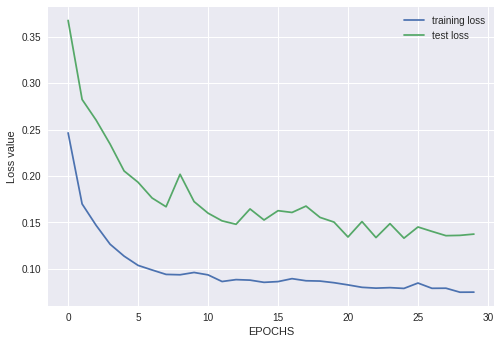

In [231]:
fig,ax = plt.subplots()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='test loss')
ax.set_xlabel('EPOCHS')
ax.set_ylabel('Loss value')
plt.legend();
plt.savefig('/content/drive/MyDrive/Colab Notebooks/history_LSTM.png', dpi=300, format='png', bbox_inches='tight') 

In [221]:
#calling bi-directional LSTM
input_shape=(training_set_sequence.shape[1], training_set_sequence.shape[2])

model2=bi_directional_LSTM_model()

history_2 = model2.fit(
    training_set_sequence,
    training_set_output, 
    epochs=30, 
     verbose = 2,
    batch_size=32, 
    validation_split=0.1,
    shuffle=False,
)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_14 (Bidirectio (None, 256)               144384    
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 257       
Total params: 144,641
Trainable params: 144,641
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
276/276 - 9s - loss: 0.2039 - val_loss: 0.2631
Epoch 2/30
276/276 - 4s - loss: 0.1341 - val_loss: 0.2168
Epoch 3/30
276/276 - 4s - loss: 0.1121 - val_loss: 0.2006
Epoch 4/30
276/276 - 4s - loss: 0.0979 - val_loss: 0.1922
Epoch 5/30
276/276 - 4s - loss: 0.0905 - val_loss: 0.1738
Epoch 6/30
276/276 - 4s - loss: 0.0876 - val_loss: 0.1799
Epoch 7/30
276/276 - 4s - los

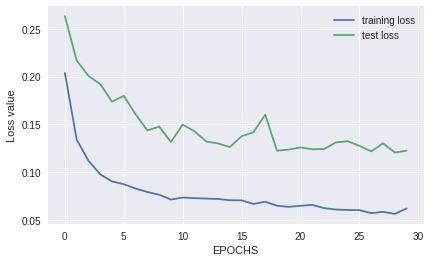

In [298]:
fig,ax = plt.subplots()
plt.plot(history_2.history['loss'], label='training loss')
plt.plot(history_2.history['val_loss'], label='test loss')
ax.set_xlabel('EPOCHS')
ax.set_ylabel('Loss value')
plt.legend();
plt.savefig('/content/drive/MyDrive/Colab Notebooks/history_bidirectional_LSTM.png', dpi=300, format='png', bbox_inches='tight') 

In [223]:
enc_dec_model = encoder_decoder_model()

history_3 = enc_dec_model.fit(
    training_set_sequence,
    training_set_output, 
    epochs=30, 
    batch_size=64, 
     verbose = 2,
    validation_split=0.1,
    shuffle=False,
)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_29 (LSTM)               (None, 200)               170400    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 7, 200)            0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 7, 200)            320800    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 7, 100)            20100     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 7, 1)              101       
Total params: 511,401
Trainable params: 511,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
138/138 - 12s - loss: 0.5977 - val_loss: 0.2906
Epoch 2/30
138/138 - 9s - loss: 0.1386 - val_loss: 0.1

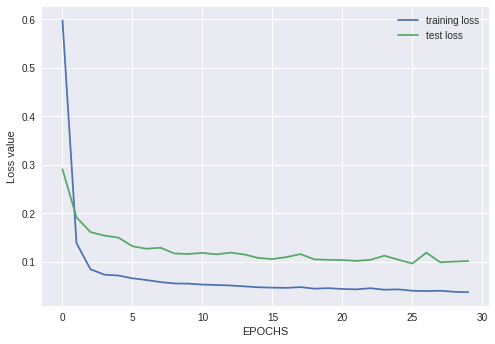

In [232]:
fig,ax = plt.subplots()
plt.plot(history_3.history['loss'], label='training loss')
plt.plot(history_3.history['val_loss'], label='test loss')
ax.set_xlabel('EPOCHS')
ax.set_ylabel('Loss value')
plt.legend();
plt.savefig('/content/drive/MyDrive/Colab Notebooks/history_enc.png', dpi=300, format='png', bbox_inches='tight') 

In [225]:
actual_testset_values = cnt_transformer.inverse_transform(test_set_output)
#model1
test_set_predictions = model.predict(test_set_sequence)
model_predictions = cnt_transformer.inverse_transform(test_set_predictions)


#model2
test_set_predictions2 = model2.predict(test_set_sequence)
model_predictions2 = cnt_transformer.inverse_transform(test_set_predictions2)


#model3
test_set_predictions3= enc_dec_model.predict(test_set_sequence)
model_predictions3= cnt_transformer.inverse_transform(test_set_predictions)


In [259]:
import matplotlib.pyplot as plt
%matplotlib inline

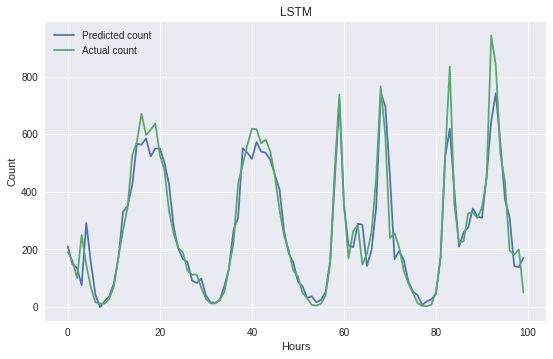

In [264]:
fig,ax = plt.subplots()

plt.plot(model_predictions[:100,], label='Predicted count')
plt.plot(actual_testset_values[:100,], label='Actual count')
ax.set_xlabel('Hours')
ax.set_ylabel('Count')
ax.set_title("LSTM")
plt.legend();
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/prediction_LSTM.png', dpi=300, format='png', bbox_inches='tight') 

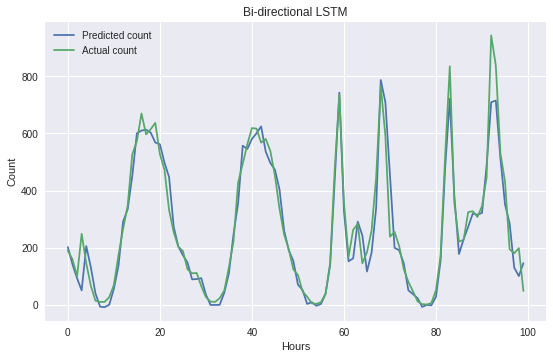

In [265]:
fig,ax = plt.subplots()

plt.plot(model_predictions2[:100,], label='Predicted count')
plt.plot(actual_testset_values[:100,], label='Actual count')
ax.set_xlabel('Hours')
ax.set_ylabel('Count')
ax.set_title("Bi-directional LSTM")
plt.legend();
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/prediction_BI_LSTM.png', dpi=300, format='png', bbox_inches='tight') 

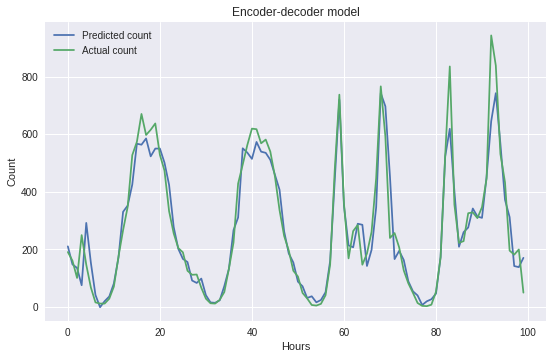

<Figure size 576x396 with 0 Axes>

In [267]:
fig,ax = plt.subplots()
plt.plot(model_predictions3[:100,], label='Predicted count')
plt.plot(actual_testset_values[:100,], label='Actual count')
ax.set_xlabel('Hours')
ax.set_ylabel('Count')
ax.set_title("Encoder-decoder model")
plt.legend();
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/prediction_Enc_Dec.png', dpi=300, format='png', bbox_inches='tight') 

In [229]:
def get_prediction(input_sequence):
    """ Gets prediction of bike share count based on input sequence
    
    Arguments:
    * input_sequence: <time_steps> hours of sequence data
    
    Returns:
    * cnt_prediction: Predicted count value of bike share
    """
    
    prediction = model.predict(input_sequence)
    cnt_prediction = cnt_transformer.inverse_transform(prediction)
    return cnt_prediction

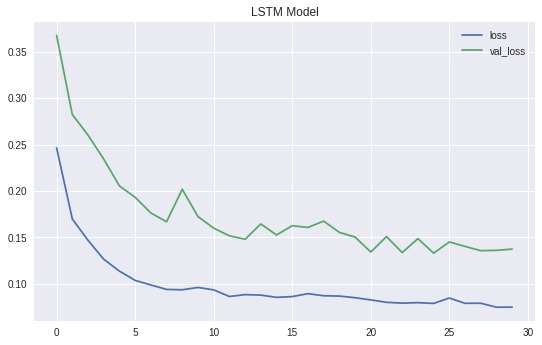

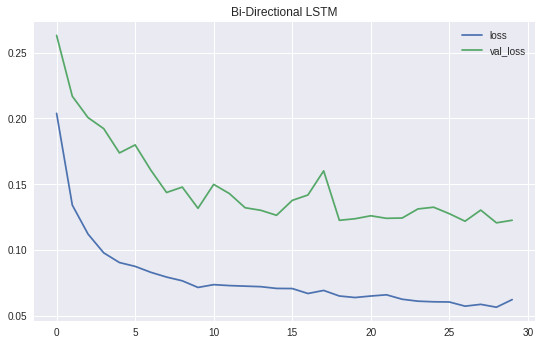

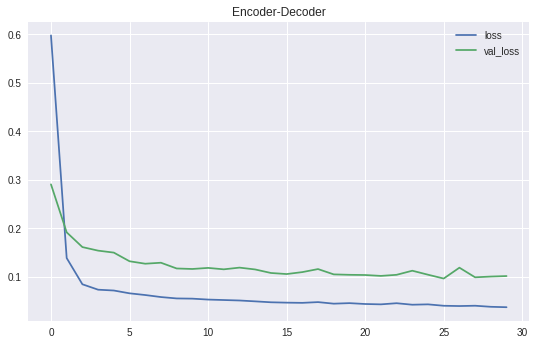

In [268]:
import pandas as pd
pd.DataFrame(history.history).plot(title="LSTM Model")
pd.DataFrame(history_2.history).plot(title="Bi-Directional LSTM")
pd.DataFrame(history_3.history).plot(title="Encoder-Decoder")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/history_loss_3_models.png', dpi=300, format='png', bbox_inches='tight') 